In [12]:
import numpy as np
import matplotlib.pyplot as plt
from algoritmer import bfgs
from tensegrity import TensegrityStructure
import tests as TEST
import os

SAVE_TO_FILE = True



[ 2.   2.  -1.5 -2.   2.  -1.5 -2.  -2.  -1.5  2.  -2.  -1.5]


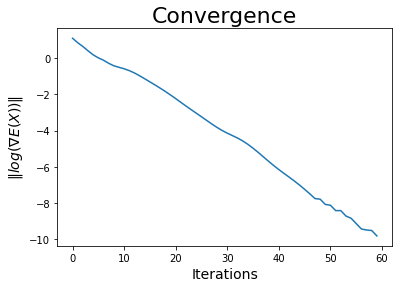

In [13]:
ts =  TEST.P25
x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=1000, convergence_plot=True)
print(res)

def conv_plot(y):
    plt.plot(np.log10(y))
    plt.title("Convergence",fontsize=22)
    plt.xlabel("Iterations",fontsize=14)
    plt.ylabel(r"$ \Vert log (\nabla E(X)) \Vert $",fontsize=14)

conv_plot(conv)

if SAVE_TO_FILE:
    plt.savefig("../Bilder/P25conv.pdf", bbox_inches='tight',pad_inches = 0) # Used in report.


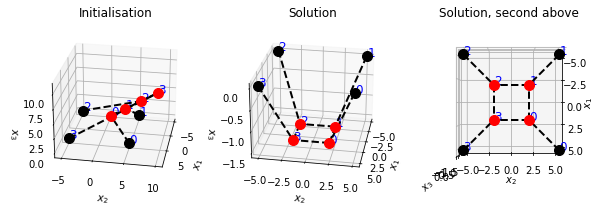

In [14]:
ts.plot(res,x0)
if SAVE_TO_FILE:
    plt.savefig("../Bilder/P25.pdf", bbox_inches='tight',pad_inches = 0) # Used in report.


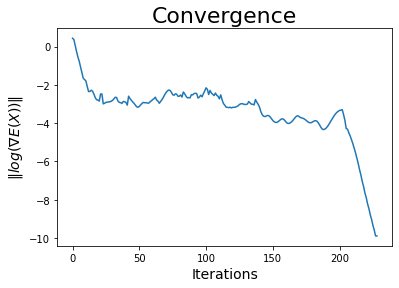

In [15]:
ts =  TEST.P69
x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=1000, convergence_plot=True)
conv_plot(conv)

if SAVE_TO_FILE:
    plt.savefig("../Bilder/P69conv.pdf", bbox_inches='tight',pad_inches = 0) # Used in report.



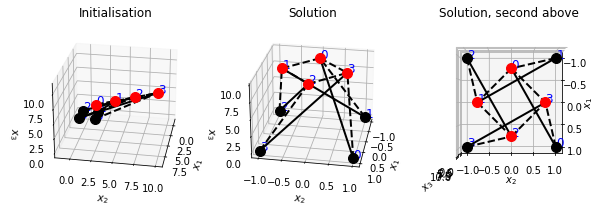

In [16]:
fig, ax = ts.plot(res, x0)

if SAVE_TO_FILE:
    plt.savefig("../Bilder/P69.pdf", bbox_inches='tight',pad_inches = 0) # Used in report.

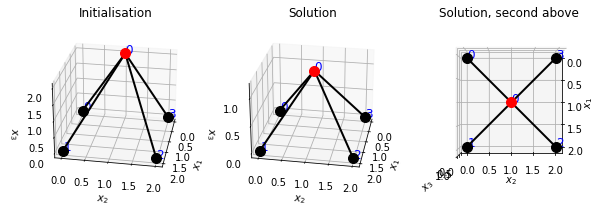

In [17]:
ts =  TEST.LOCALMIN
x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=1000, convergence_plot=True)
fig, ax = ts.plot(res, x0)
if SAVE_TO_FILE:
    plt.savefig("../Bilder/localminpos.pdf",bbox_inches='tight',pad_inches = 0)


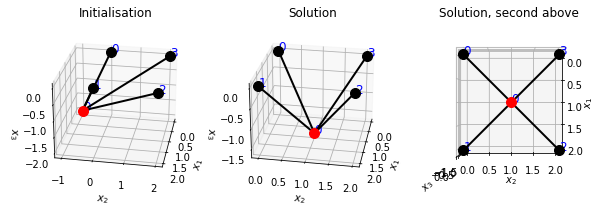

In [18]:
ts =  TEST.LOCALMIN
x0 = -np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=1000, convergence_plot=True)
fig, ax = ts.plot(res, x0)
if SAVE_TO_FILE:
    plt.savefig("../Bilder/localminneg.pdf", bbox_inches='tight',pad_inches = 0)


 0: 335, 1 
 1: 38, 6.0 
 2: 33, 72.0 
 3: 40, 864.0 
 4: 48, 10368.0 
 5: 50, 124416.0 
 6: 799, 1492992.0 
 7: 1000, 4478976.0 
 8: 37, 6718464.0 
 9: 383, 80621568.0 


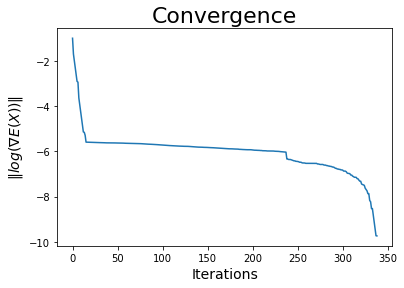

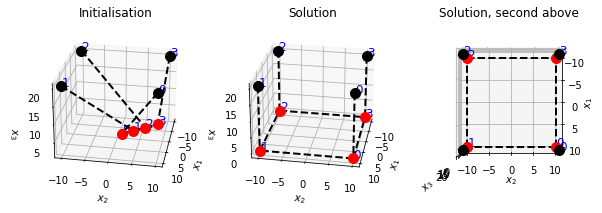

In [19]:
ts = TEST.SANITYCHECK
x0 = np.arange(3 * len(ts.free_weights))

mu = 1
prev = x0
for i in range(10):
    res, num = bfgs(prev, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f' {i}: {num}, {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 1e10)

    if np.linalg.norm(res - prev) < 1e-12:
        break
    prev = res

res, conv = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000, convergence_plot=True)


conv_plot(conv)
if SAVE_TO_FILE:
    plt.savefig("../Bilder/sanitycheckconv.pdf", bbox_inches='tight',pad_inches = 0) 

fig, ax = ts.plot(res,x0)
if SAVE_TO_FILE:
    plt.savefig("../Bilder/sanitycheck.pdf", bbox_inches='tight',pad_inches = 0) 
#!


 0: 808, 1 
 1: 194, 3.0 
 2: 177, 36.0 
 3: 301, 432.0 
 4: 204, 2592.0 
 5: 338, 31104.0 
 6: 41, 186624.0 
 7: 44, 2239488.0 
 8: 27, 26873856.0 
 9: 40, 322486272.0 


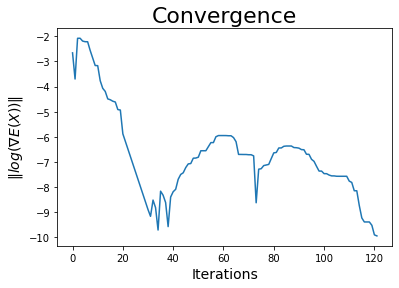

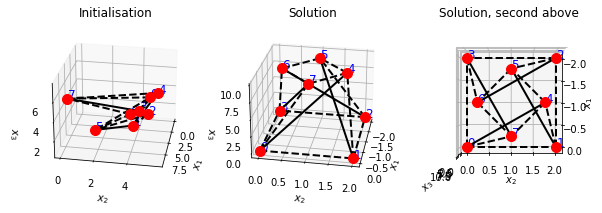

In [20]:
ts = TEST.FREESTANDING
# x0 = np.arange(3 * len(ts.free_weights))

x0 = np.random.uniform(0, 10, size=(3 * len(ts.free_weights)))

mu = 1
prev = x0
for i in range(10):
    res, num = bfgs(prev, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f' {i}: {num}, {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 1e10)

    if np.linalg.norm(res - prev) < 1e-12:
        break
    prev = res

res, conv = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000, convergence_plot=True)


conv_plot(conv)
if SAVE_TO_FILE:
    plt.savefig("../Bilder/freestandingconv.pdf", bbox_inches='tight',pad_inches = 0) # Used in report.

fig, ax = ts.plot(res,x0)
if SAVE_TO_FILE:
    plt.savefig("../Bilder/freestanding.pdf", bbox_inches='tight',pad_inches = 0) # Used in report.




 0: 1000, 1 
 1: 1000, 1.5 
 2: 618, 2.25 
 3: 319, 6.75 
 4: 435, 40.5 
 5: 392, 243.0 
 6: 348, 1458.0 
 7: 474, 8748.0 
 8: 623, 52488.0 
 9: 40, 157464.0 


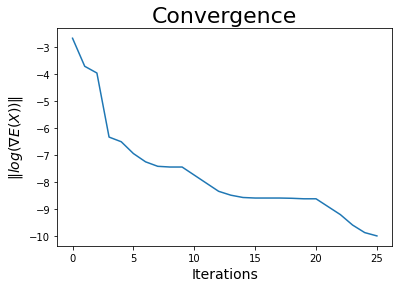

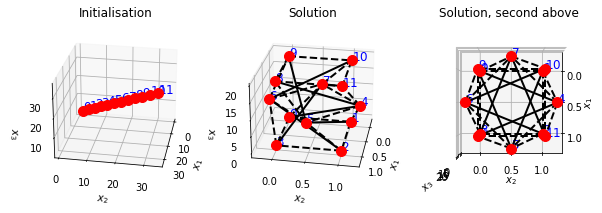

In [21]:
n = 2
ts = TEST.STORIES(n)
x0 = np.arange(3 * len(ts.free_weights))
# x0 = np.random.uniform(10, 20, size=(3 * len(ts.free_weights)))

mu = 1
prev = x0
for i in range(10):
    res, num = bfgs(prev, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f' {i}: {num}, {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 1e10)

    if np.linalg.norm(res - prev) < 1e-12:
        break

    prev = res


res, conv = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000, convergence_plot=True)

conv_plot(conv)

if SAVE_TO_FILE:
    plt.savefig(f'../Bilder/{n}freestandingconv.pdf', bbox_inches='tight',pad_inches = 0) # Used in report.

fig, ax = ts.plot(res,x0)

if SAVE_TO_FILE:
    plt.savefig(f'../Bilder/{n}freestanding.pdf', bbox_inches='tight',pad_inches = 0) # Used in report.


